In [2]:
from scipy import stats
#import handcalcs.render
#import qgrid
#import arviz as az
import numpy as np
import matplotlib.pyplot as plt
#import pymc3 as pm
import seaborn as sns
import pandas as pd
#from theano import shared
from sklearn import preprocessing
from scipy.stats import expon
from scipy.stats import beta
from scipy.stats import gamma
from scipy.stats import poisson
#print('Running on PyMC3 v{}'.format(pm.__version__))
#sns.set()
#import ipywidgets as widgets
#from ipywidgets import interact, interact_manual

### Terminology

Before applying Bayes’ theorem, let’s introduce some terminology.
- Experiment: pick a coin from the drawer at random, flip it, and record the result.
- Data: the result of our experiment. In this case the event D = ‘heads’. We think of
D as data that provides evidence for or against each hypothesis. 
- Hypotheses: we are testing three hypotheses: the coin is type A, B or C . 

- Prior probability: the probability of each hypothesis prior to tossing the coin (collect-
ing data). Since the drawer has 2 coins of type A, 2 of type B and 1 or type C we
have
    - P (A) = 0.4,
    - P (B) = 0.4,
    - P (C ) = 0.2.

- Likelihood: (This is the same likelihood we used for the MLE.) The likelihood function
is P (D|H), i.e., the probability of the data assuming that the hypothesis is true. Most
often we will consider the data as fixed and let the hypothesis vary. For example,
P (D|A) = probability of heads if the coin is type A. In our case the likelihoods are
    - P (D|A) = 0.5,
    - P (D|B) = 0.6, 
    - p (D|C) =0.9
    
- The name likelihood is so well established in the literature that we have to teach it to you. However in colloquial language likelihood and probability are synonyms. This leads to the likelihood function often being confused with the probabity of a hypothesis. Because of this we’d prefer to use the name Bayes’ term. However since we are stuck with ‘likelihood’ we will try to use it very carefully and in a way that minimizes any confusion. 

-  Posterior probability: the probability (posterior to) of each hypothesis given the data
from tossing the coin.
P (A|D),
P (B|D),
P (C|D).
These posterior probabilities are what the problem asks us to find.

*What is the difference between PMF and likelihood?*
- The PMF treats data as varying from experiment to experiment and  θ
as fixed, whereas the likelihood function treats the data as fixed and the parameter θ as varying.

#### Initial Priors

In [3]:
p_a = 0.4
p_b = 0.4
p_c = 0.2

#### Initial Likelihood 

- Given we have seen one data point which is *HEAD* 
- This is also called DATA or evidence
- The likelihood function is P (D|H), i.e., the probability of the data assuming that the hypothesis is true. Most
often we will consider the data as fixed and let the hypothesis vary. For example,
P (D|A) = probability of heads if the coin is type A.

In [4]:
#probability of Heads given A
p_H_a = 0.5
p_H_b = 0.6
p_H_c = 0.9

#### Posterior Calculation

In [5]:
p_a_H = p_H_a * p_a
p_b_H = p_H_b * p_b 
p_c_H = p_H_c * p_c 

print(f'Posterior for A {p_a_H}')
print(f'Posterior for B {p_b_H}')
print(f'Posterior for C {p_c_H}')

Posterior for A 0.2
Posterior for B 0.24
Posterior for C 0.18000000000000002


In [6]:
def posterior_calc(prior, likelihood):
    posterior = prior * posteior 
    return posterior

#### Updating Priors

In [7]:
#so say we observed the second toss as HEAD again

p_a_HH = p_H_a * p_a_H
p_b_HH = p_H_b * p_b_H 
p_c_HH = p_H_c * p_c_H

print(f'Posterior for A {p_a_HH}')
print(f'Posterior for B {p_b_HH}')
print(f'Posterior for C {p_c_HH}')

Posterior for A 0.1
Posterior for B 0.144
Posterior for C 0.16200000000000003


#### All in one Code

- The Hypotheis we need to find P(H/E1, E2)
    -Which means what is thee probability of H given we see two datapoints E1,E2

- Example Consideration
    - Hypotesis (H): There are two coins A and B and our goal is to find which one it is based on the data P(H/E1,E2....E12)
    - Data: Say we observed 12 data points from E1 to E12 and are [1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1]
        - 1 means observed Heads and 0 means observed Tails
    - Prior Probability : The probability of coin A or coin B before observing any data
         say: P(A)=0.8 and P(B)=0.2
    - Likelihood: The Probability of observing this data given the hypotheis
         - P(Heads(1)/A) = 0.5 and P(Heads(1)/B)=0.85
         - P(Tails(0)/A) = 0.5 and P(Tails(1)/B)=0.15
    - Given this we information we have to calculate posterior distribution 
         - P(A/E1...E12) and P(B/E1....E12)
         - Postreior Distribution = Prior * Likelihood
            
- Algorithm 
    - Step 1: Say the first data observed is Heads = 1
    - Step 2: Calculate Posterior = likelihood*priors
           P(A/E1)= 0.5 * 0.8=.40/P(E1) and P(B/E1)= 0.85*.2=0.17/P(E12)
    - Step 3: Now we observe our another sample E2= Heads = 1
    - Step 4: Our posterior in Step 2 becomes the new prior and likelihood is the same for our hypotheesis
    - Step 5: Updated posteriors are:
            P(A/E1,E2) = P(E2/A)*P(A/E1) = 0.5*0.40=.20/P(E1,E2)  
            P(B/E1,E2) = P(E2/B)*P(B/E1) = 0.85*.17=0.1445/P(E1,E2)
            
    - Step 6: We normalize the posterior probability numerator to 1 since we only care which hypotheesissis has a better chance and ndenominator is thee same
            - After Sample 1 (Heads): 0.70175439 0.29824561
            - After Sample 2: (Heads): 0.58055152 0.41944848
    - Step 7: I have simulated this data for 12 datapoints and shown how if we keep observing one the chances of coin B which is Biased increases eeven though it has a low priors

In [8]:

priors = np.asarray([0.8,.2])
likelihood = np.asarray([0.5,.85])

In [9]:
def update_posterior(priors, likelihood, samples):
  n_step_posterior = []
  for i in range(len(samples)): 
    if samples[i]==1:
        likelihood=likelihood #if the toss is HEAD, the likelihood is the same
    else:
        likelihood=1-likelihood #if the toss is TAIL, the likelihood is 1-the likelihood
    posteriors = priors*likelihood #multiply the priors by the likelihood
    print(f'Posterior for A {posteriors[0]:.2f}, Posterior for B {posteriors[1]:.2f}')
    normalized_posteriors = posteriors/sum(posteriors) #normalize the posteriors
    print(f'Normalized Posterior for A {normalized_posteriors[0]:.2f}, Normalized Posterior for B {normalized_posteriors[1]:.2f}')
    n_step_posterior.append(normalized_posteriors) #append the normalized posteriors to the list
    priors = posteriors #update the priors
  return n_step_posterior #return the list of normalized posteriors
   

In [10]:
data = [1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1] #the data
likelihood = np.asarray([0.5,.85]) #the likelihood of the toss being HEAD for A and B respectively
priors = np.asarray([0.8,.2]) #priors for A and B respectively
updated_posterior_pmf = update_posterior(priors, likelihood, data) #update the posteriors

Posterior for A 0.40, Posterior for B 0.17
Normalized Posterior for A 0.70, Normalized Posterior for B 0.30
Posterior for A 0.20, Posterior for B 0.14
Normalized Posterior for A 0.58, Normalized Posterior for B 0.42
Posterior for A 0.10, Posterior for B 0.02
Normalized Posterior for A 0.82, Normalized Posterior for B 0.18
Posterior for A 0.05, Posterior for B 0.00
Normalized Posterior for A 0.94, Normalized Posterior for B 0.06
Posterior for A 0.03, Posterior for B 0.00
Normalized Posterior for A 0.90, Normalized Posterior for B 0.10
Posterior for A 0.01, Posterior for B 0.00
Normalized Posterior for A 0.84, Normalized Posterior for B 0.16
Posterior for A 0.01, Posterior for B 0.00
Normalized Posterior for A 0.76, Normalized Posterior for B 0.24
Posterior for A 0.00, Posterior for B 0.00
Normalized Posterior for A 0.65, Normalized Posterior for B 0.35
Posterior for A 0.00, Posterior for B 0.00
Normalized Posterior for A 0.52, Normalized Posterior for B 0.48
Posterior for A 0.00, Poster

#### Normalizing the posterior 

In [11]:
normalized = updated_posterior_pmf[-1]/sum(updated_posterior_pmf[-1])

In [12]:
normalized

array([0.02571685, 0.97428315])

[0.70175439 0.29824561]
[0.58055152 0.41944848]
[0.82186152 0.17813848]
[0.9389451 0.0610549]
[0.90046081 0.09953919]
[0.84180593 0.15819407]
[0.75788131 0.24211869]
[0.64804811 0.35195189]
[0.51994996 0.48005004]
[0.38917389 0.61082611]
[0.27261125 0.72738875]
[0.18063629 0.81936371]
[0.11479505 0.88520495]
[0.07087674 0.92912326]
[0.04294555 0.95705445]
[0.02571685 0.97428315]


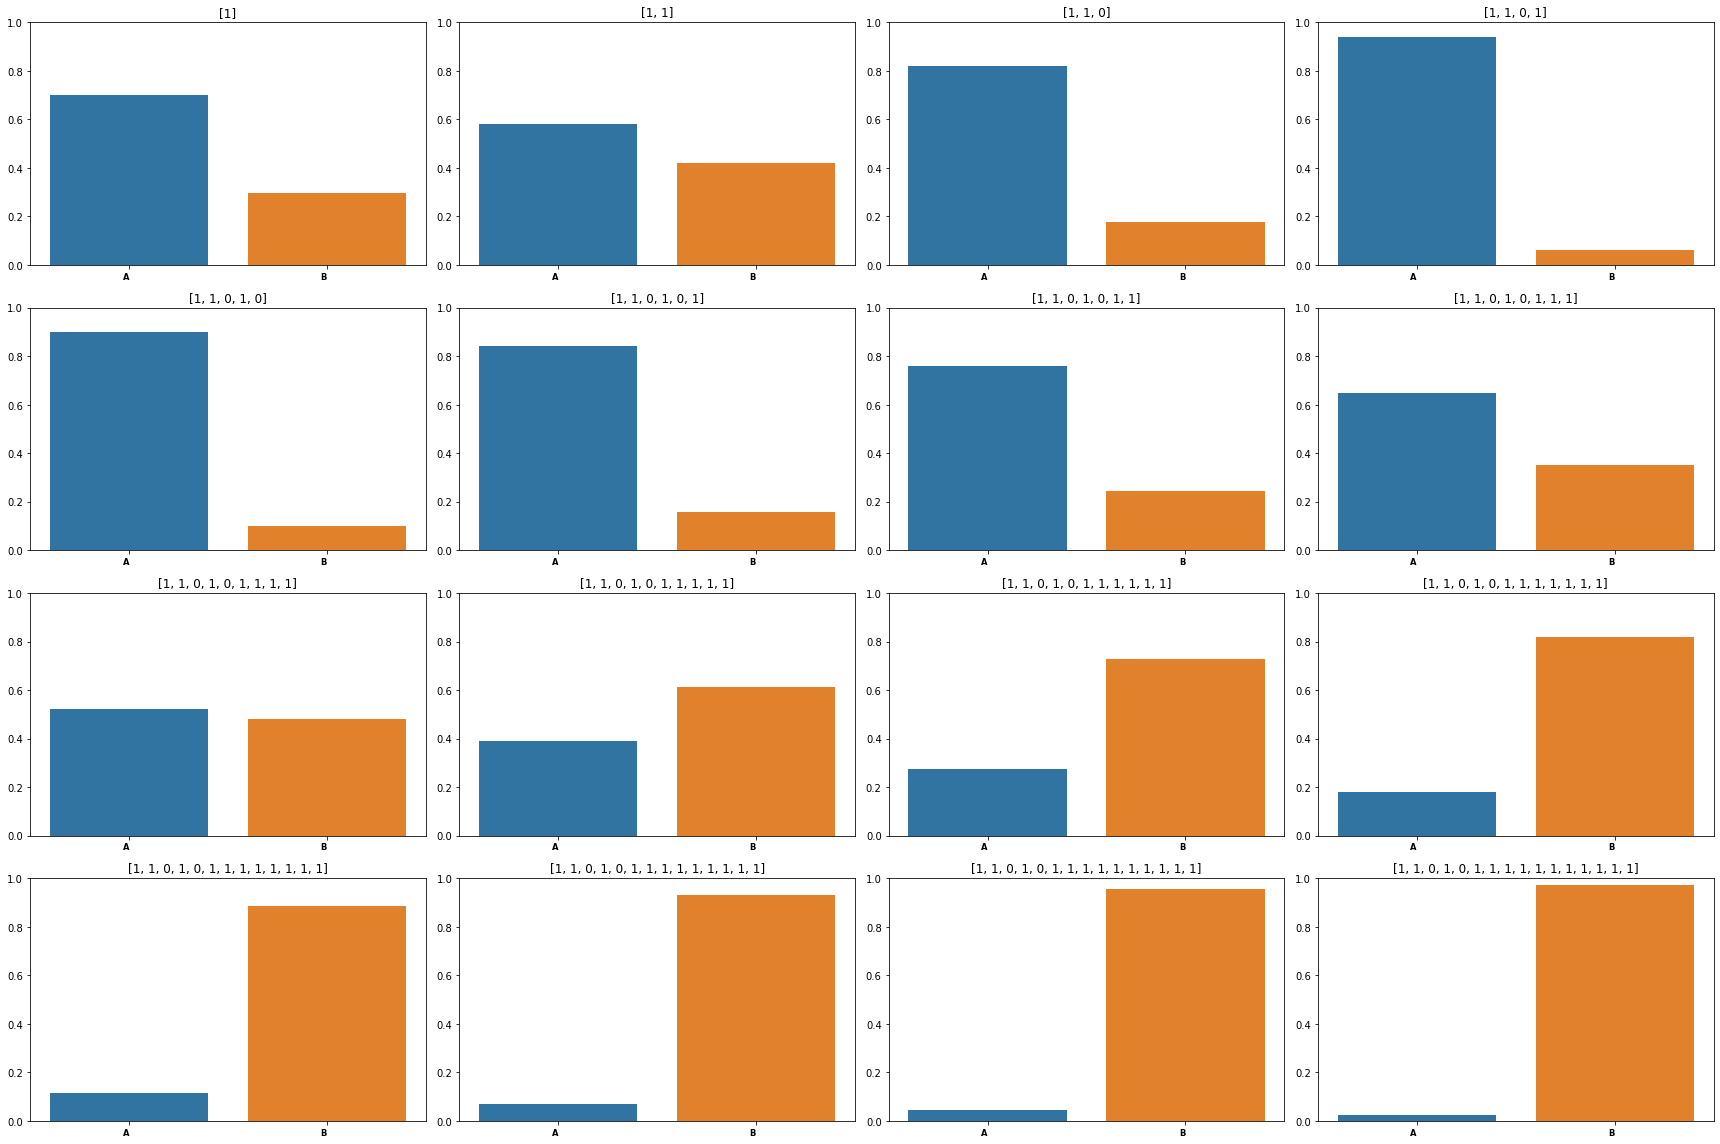

In [13]:
fig = plt.figure(figsize=[24,16])
for x,cli in enumerate(updated_posterior_pmf):
       ax=fig.add_subplot(4,4,x+1)
       print(cli)
       g = sns.barplot(x=["A","B"],y=cli,ax=ax)  
       ax.set_xlabel('',fontsize=14)
       ax.set_ylabel('',fontsize=14)
       ax.set_title(f'{data[:x+1]}')
       plt.ylim(0,1)
       plt.xticks(rotation=0, horizontalalignment='right', fontweight='bold', fontsize='small')
plt.tight_layout() 
plt.show()

In [14]:
#!pip3 install plotly

In [15]:
# convert the list of lists to a dataframe
df = pd.DataFrame(updated_posterior_pmf)
df.columns = ['A', 'B']
df

,A,B
0,0.701754,0.298246
1,0.580552,0.419448
2,0.821862,0.178138
3,0.938945,0.061055
4,0.900461,0.099539
5,0.841806,0.158194
6,0.757881,0.242119
7,0.648048,0.351952
8,0.519950,0.480050
9,0.389174,0.610826


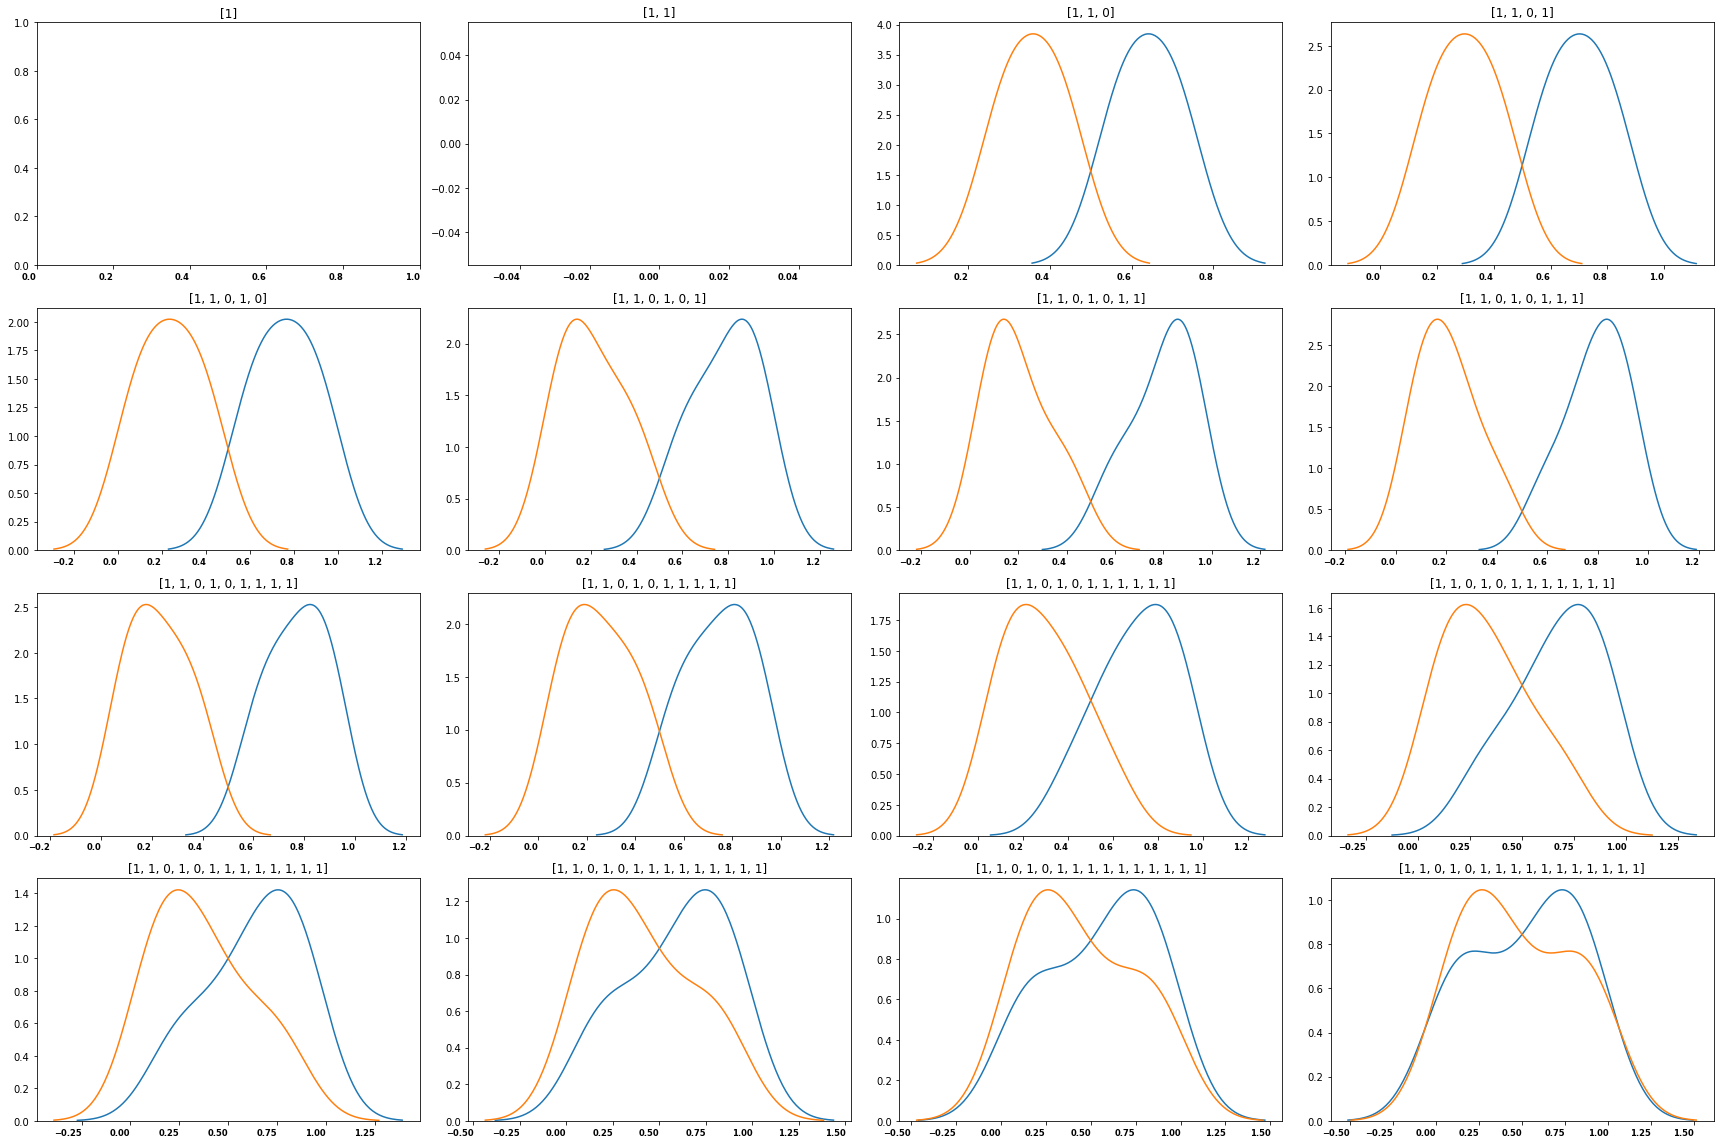

In [16]:
fig = plt.figure(figsize=[24,16])
for i in range(len(df)):
    ax = fig.add_subplot(4,4,i+1)
    g = sns.kdeplot(df['A'].iloc[:i], ax=ax, label='A', warn_singular=False)
    h = sns.kdeplot(df['B'].iloc[:i], ax=ax, label='B', warn_singular=False)
    ax.set_xlabel('',fontsize=14)
    ax.set_ylabel('',fontsize=14)
    ax.set_title(f'{data[:i+1]}')
    #plt.xlim(0,1)
    plt.xticks(rotation=0, horizontalalignment='right', fontweight='bold', fontsize='small')
plt.tight_layout()
plt.show()

In [17]:
df['A'].iloc[:5]

0    0.701754
1    0.580552
2    0.821862
3    0.938945
4    0.900461
Name: A, dtype: float64

#### Epsilon Greedy Sampling

In [18]:
NUM_TRIALS = 10000 #number of trials
EPS = 0.1 #epsilon for probablity of exploration
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75] #probabilities of the bandits (A, B, C)

In [19]:
class BanditArm:
    def __init__(self, p):
        self.p = p #probability of success for this arm (True Estimate)
        self.p_estimate = 0.0 #initialize the estimate of the probability of success (Current Estimate)
        self.mean = 0 #mean of the rewards
        self.N = 0 #number of times the arm has been pulled
    
    #simulation of pulling the arm
    #returns the reward
    def pull(self):
        #if the random number is less than the probability of the arm being pulled, the arm returns a 1
        return np.random.random() < self.p #bernoulli trial with probability of success self.p and returns 1 or 0
    
    #update the estimate of the probability of success
    def update(self, x):
        #update the mean of the rewards
        self.N += 1 #increment the number of times the arm has been pulled
        self.mean = (self.mean * (self.N - 1) + x) / self.N #update the mean of the rewards
        self.p_estimate = self.mean #update the estimate of the probability of success
    
    def __repr__(self):
        return f'Arm with probability {self.p}'

Optimal arm is 2
 Mean reward for Arm with probability 0.2 is 0.18
 Mean reward for Arm with probability 0.5 is 0.53
 Mean reward for Arm with probability 0.75 is 0.74
total reward earned: 7132.0
overall win rate: 0.7132
num_times_explored: 1029
num_times_exploited: 8971
num times selected optimal bandit: 9225


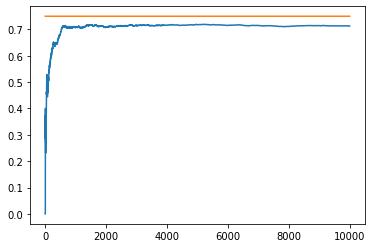

In [20]:
def experiment():
    #create a list of arms
    bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]
    #initialize the rewards list to 0 for each pull of the arms
    rewards = np.zeros(NUM_TRIALS)

    num_times_explored = 0 #number of times the arms were pulled
    num_times_exploited = 0 #number of times the arms were pulled and the arm was successful
    num_optimal = 0 #number of times the optimal arm was pulled
    optimal_arm = np.argmax([b.p for b in bandits]) #index of the optimal arm (the arm with the highest probability)
    print(f'Optimal arm is {optimal_arm}')

    #loop through the number of trials and pull the arms
    # 1. pick the arm to pull based on the algorithm
    # 2. update the algorithm parameters
    for i in range(NUM_TRIALS):
        #explore the bandit by pulling a random arm with probability EPS
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(0, len(bandits))
            #print(f'Exploring arm {j}')
        else:
            #exploit the bandit by pulling the arm with the highest probability
            j = np.argmax([b.p_estimate for b in bandits])
            #print(f'Exploiting arm {j}')
            num_times_exploited += 1

        if j == optimal_arm:
            num_optimal += 1

        #pull the arm and get the reward from the arm and update the reward list
        x = bandits[j].pull()
        #update the reward list with the reward from the arm
        bandits[j].update(x)
        #record the reward
        rewards[i] = x
    

    for b in bandits:
        print(f' Mean reward for {b} is {b.mean:.2f}')

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

if __name__ == "__main__":
  experiment()


## UCB1 Theory

Let $n_t(a)$ be the number of times arm "a" is selected in rounds 1,2,…,t and $\mu_t(a)$ be the average reward of arm a up to time t. The upper confidence bound is defined as:

$UCB_t(a) = \mu_t(a)+ \sqrt{\frac{2 \log(t)}{ N_k(t)}}$


where $\mu_t(a)$ can be computed as `rewards[k] / pulls[k]` and the bound can be computed as `sqrt((2 * log(t)) / pulls[k]`.

The UCB1 algorithm chooses the best arm based on an optimistic estimate.

- As seen in the graph logN grows much slowly as compared to linear ${N_k(t)}$
- So if we have 1000 samples and ${N_k(t)}$ is pulled 1000 times than that additional term would only contribute 0.1
- where as if we have pulled 1000 samples and ${N_k(t)}$ is pulled only 10 times so the exploring term will contribute. 0.3

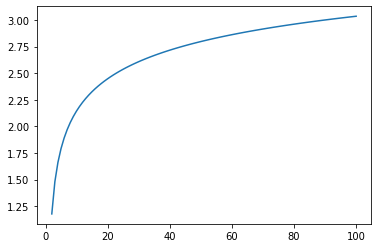

In [21]:
import numpy as np
x = np.linspace(2,100,100)
y = [np.sqrt(2*np.log(value)) for value in x]
plt.plot(x,y)
plt.show()

### UCB1 Modeling

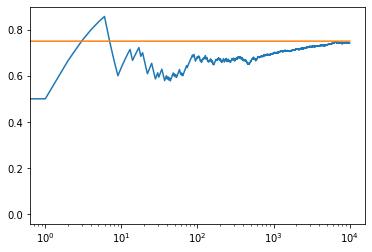

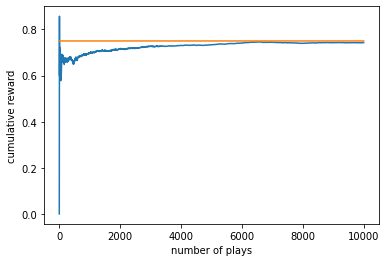

 Mean reward for Arm with probability 0.2 is 0.22
 Mean reward for Arm with probability 0.5 is 0.46
 Mean reward for Arm with probability 0.75 is 0.75
total reward earned: 7428.0
overall win rate: 0.7428
num_times_explored: 10009
num_times_exploited: [58, 164, 9787]


In [22]:
class UCBandit:
    def __init__(self, p):
        self.p = p #probability of success for this arm (True Estimate)
        self.p_estimate = 0.0 #initialize the estimate of the probability of success (Current Estimate)
        self.mean = 0.0 #mean of the rewards
        self.N = 0 #number of times the arm has been pulled

    #simulation of pulling the arm
    #returns the reward
    def pull(self):
        #if the random number is less than the probability of the arm being pulled, the arm returns a 1
        return np.random.random() < self.p

    #update the estimate of the probability of success
    def update(self, x):
        #update the mean of the rewards
        self.N += 1
        self.mean = (self.mean * (self.N - 1) + x) / self.N #update the mean of the rewards
        self.p_estimate = self.mean #for bernoulli distribution, p_estimate = mean

    def __repr__(self):
        return f'Arm with probability {self.p}'

def ucb(mean, N, n_j):
  #mean: mean of the arm
  #N: number of total pulls
  #n_j: number of times the arm j has been pulled.
  return mean + np.sqrt(2*np.log(N) / n_j)

def run_experiment():
    bandits = [UCBandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.zeros(NUM_TRIALS)
    total_plays = 0

    #play the bandits once to initialize the bandits
    #for j in range(len(bandits)):
        #n_j = 0
    for i in range(len(bandits)):
            initial_reward = bandits[j].pull()
            total_plays += 1
            bandits[j].update(initial_reward)

    #loop through the number of trials and pull the arms
    for i in range(NUM_TRIALS):
        #explore by UCB algorithm to pick the arm to pull based on the mean of the arm and the number of times it has been pulled
        j = np.argmax([ucb(b.mean, total_plays, b.N) for b in bandits])
        
        #pull the arm and get the reward from the arm and update the reward list
        reward = bandits[j].pull()
        
        #total number of times the arm has been pulled
        total_plays += 1
        
        #update the reward list with the reward from the arm
        bandits[j].update(reward)

        #record the reward
        rewards[i] = reward

    cumulative_rewards = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)
    win_rates = rewards.sum() / NUM_TRIALS
    plt.plot(cumulative_rewards)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.xscale('log')
    plt.show()

    # plot moving average of cumulative rewards
    plt.plot(cumulative_rewards, label='cumulative rewards')
    plt.xlabel('number of plays')
    plt.ylabel('cumulative reward')
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()


    for b in bandits:
        print(f' Mean reward for {b} is {b.mean:.2f}')
    
    print("total reward earned:", rewards.sum())
    print("overall win rate:", win_rates)
    print("num_times_explored:", total_plays)
    print("num_times_exploited:", [b.N for b in bandits])
    return  cumulative_rewards

if __name__ == '__main__':
  run_experiment()
        

In [23]:
x = np.array([1,2,3,4,5,6,7,8,9,10]) 
np.cumsum(x)/ 10

array([0.1, 0.3, 0.6, 1. , 1.5, 2.1, 2.8, 3.6, 4.5, 5.5])

In [24]:
np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES)

array([0.75, 0.75, 0.75, ..., 0.75, 0.75, 0.75])

## Thomson Sampling

- If confidence interval is fat we should explore more
- when confidence interval is small we should explore less.
- Small dataset has large confidence Interval and vice versa

In [64]:
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

Optimal arm is 2


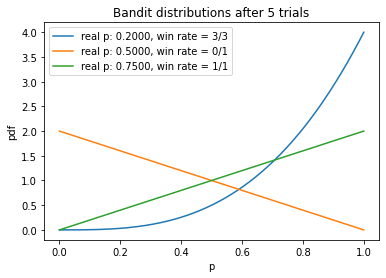

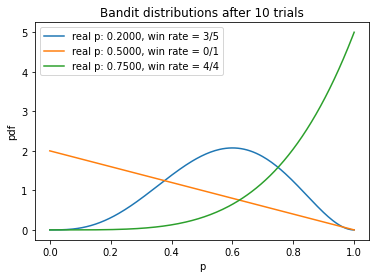

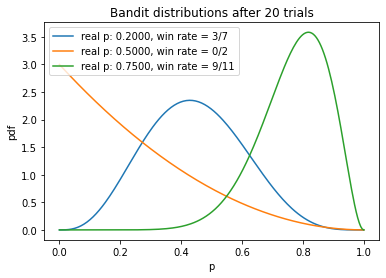

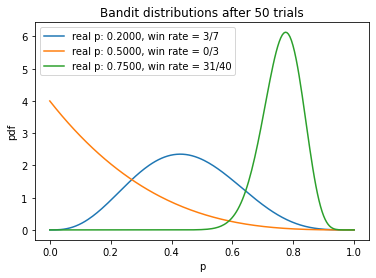

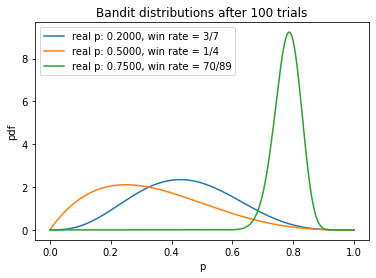

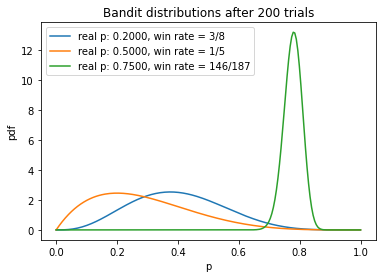

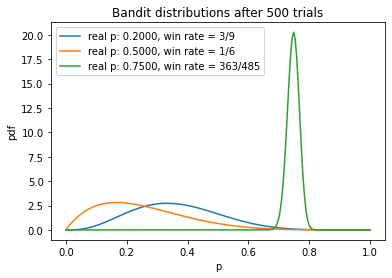

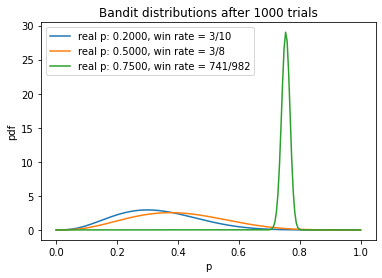

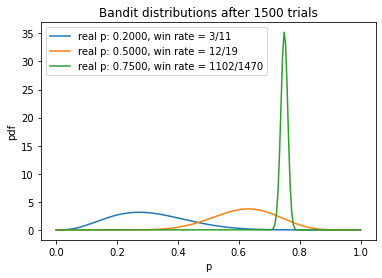

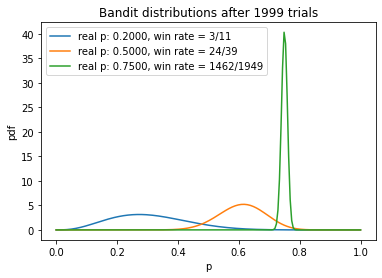

total reward earned: 7544.0
overall win rate: 0.7544
num times selected each bandit: [14, 74, 9912]
num times selected the optimal arm: 9912


In [69]:
class thomsonBandit:
    def __init__(self, p):
        self.p = p #probability of success for this arm (True Estimate)
        self.a = 1 #initialize the estimate with uniform distribution beta(1,1) which is equal chance of success and failure
        self.b = 1 #failure count is initialized to 1
        self.N = 0 #number of times the arm has been pulled

        

    def pull(self):
        #if the random number is less than the probability of the arm being pulled, the arm returns a 1
        return np.random.random() < self.p

    def sample(self):
        #returns a probability between 0 and 1 of the arm being pulled given a beta distribution with parameters a and b
        # a is reward successs , b is reward failure
        return np.random.beta(self.a, self.b)

    def update(self, x):
        #Update a and b based on the reward
        #if the reward is 1, then a is incremented by 1 and b is decremented by 0 (1-x)
        self.N += 1
        self.a += x
        self.b += 1 - x

    def __repr__(self):
        return f'Arm with probability {self.p}'

def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    # plot the estimated pdf for each arm
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label=f"real p: {b.p:.4f}, win rate = {b.a - 1}/{b.N}")
  plt.title(f"Bandit distributions after {trial} trials")
  plt.xlabel('p')
  plt.ylabel('pdf')
  plt.legend()
  plt.show()


def run_experiment():
    bandits = [thomsonBandit(p) for p in BANDIT_PROBABILITIES]

    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]

    rewards = np.zeros(NUM_TRIALS)
    optimal_arm = np.argmax([b.p for b in bandits]) #index of the optimal arm (the arm with the highest probability)
    print(f'Optimal arm is {optimal_arm}')
    number_of_times_optimal_arm_chosen = 0

    
    for i in range(NUM_TRIALS):

        # pick the arm to pull based on the probablit of success sampled (Thomson Smapling) from the beta distribution of each arm
        j = np.argmax([b.sample() for b in bandits])


        if i in sample_points:
            plot(bandits, i)

        if j == optimal_arm:
            # if the arm is the optimal arm, then the reward is 1
            number_of_times_optimal_arm_chosen += 1
        
        # pull the arm and get the reward from the arm and update the reward list
        x = bandits[j].pull()
        
        # update the reward list with the reward from the arm
        bandits[j].update(x)

        # record the reward
        rewards[i] = x

        # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num times selected each bandit:", [b.N for b in bandits])
    print("num times selected the optimal arm:", number_of_times_optimal_arm_chosen)


if __name__ == "__main__":
  run_experiment()


## Thomson Sampling for Normal Distribution

In [ ]:
class thomsonBandit:
    def __init__(self, p):
        self.p = p #probability of success for this arm (True Estimate)
        self.a = 1 #initialize the estimate with uniform distribution beta(1,1) which is equal chance of success and failure
        self.b = 1 #failure count is initialized to 1
        self.N = 0 #number of times the arm has been pulled

        

    def pull(self):
        #if the random number is less than the probability of the arm being pulled, the arm returns a 1
        return np.random.random() < self.p

    def sample(self):
        #returns a probability between 0 and 1 of the arm being pulled given a beta distribution with parameters a and b
        # a is reward successs , b is reward failure
        return np.random.beta(self.a, self.b)

    def update(self, x):
        #Update a and b based on the reward
        #if the reward is 1, then a is incremented by 1 and b is decremented by 0 (1-x)
        self.N += 1
        self.a += x
        self.b += 1 - x

In [113]:
BANDIT_MEANS = [5,7.5, 12.5]
NUM_TRIALS = 10000

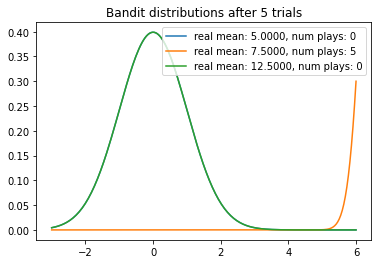

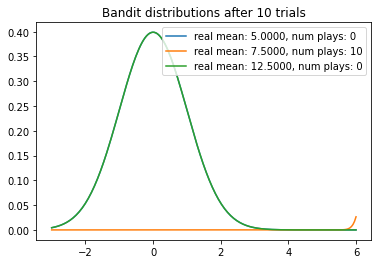

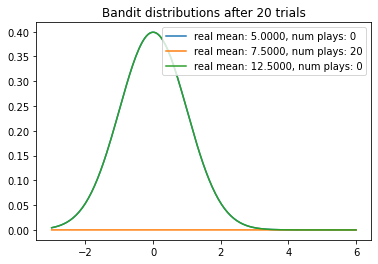

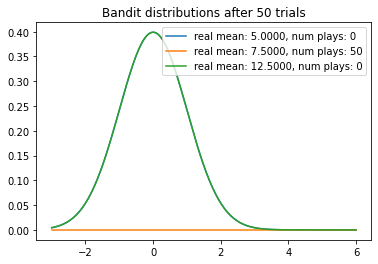

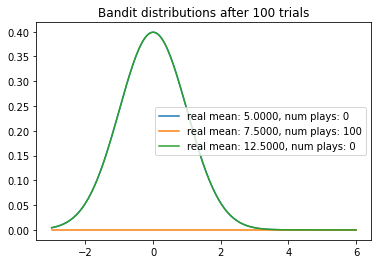

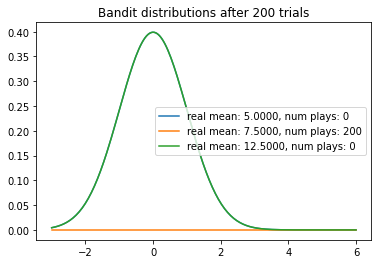

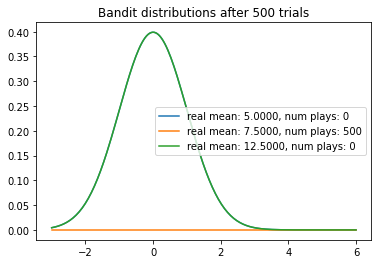

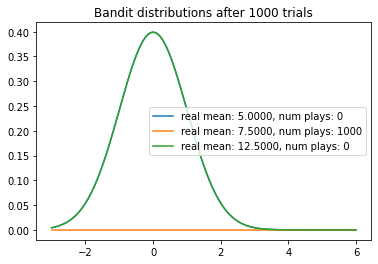

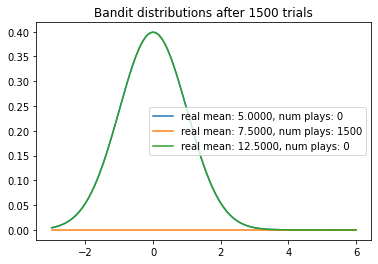

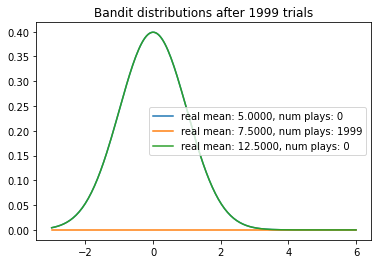

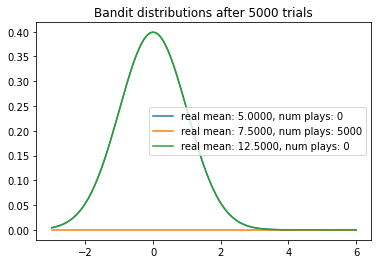

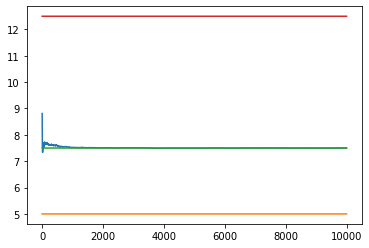

In [114]:
from turtle import numinput
from scipy.stats import norm


class thomsonNormalbandit:
    def __init__(self,true_mean):
        self.true_mean = true_mean #probability of success for this arm (True Estimate)
        self.m = 0 #predicted mean of the normal distribution
        self.lambda_ = 1 #prior is N(0,1)
        self.tau = 1 #tau is the precision of the normal distribution
        self.N = 0 #number of times the arm has been pulled

    def pull(self):
       
        #return np.random.randn() / np.sqrt(self.tau) + self.true_mean
        return np.random.normal(self.true_mean,1,1) [0]

    def sample(self):
        #returns a random value from the normal distribution with mean m and precision tau
        #return np.random.randn() / np.sqrt(self.lambda_) + self.m
        return np.random.normal(self.m,1,1) [0]

    def update(self, x):
        self.m = (self.tau * x + self.lambda_ * self.m) / (self.tau + self.lambda_)
        self.lambda_ += self.tau
        self.N += 1

    def __repr__(self): 
        return f'Arm with mean {self.true_mean}'

def plot(bandits, trial):
  x = np.linspace(-3, 6, 200)
  for b in bandits:
    y = norm.pdf(x, b.m, np.sqrt(1. / b.lambda_))
    plt.plot(x, y, label=f"real mean: {b.true_mean:.4f}, num plays: {b.N}")
  plt.title(f"Bandit distributions after {trial} trials")
  plt.legend()
  plt.show()


def run_experiment():
  bandits = [thomsonNormalbandit(m) for m in BANDIT_MEANS]

  sample_points = [5,10,20,50,100,200,500,1000,1500,1999,5000,10000]
  rewards = np.empty(NUM_TRIALS)
  for i in range(NUM_TRIALS):
    # Thompson sampling
    j = np.argmax([b.sample() for b in bandits])

    # plot the posteriors
    if i in sample_points:
      plot(bandits, i)

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

    # update rewards
    rewards[i] = x

  cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  for m in BANDIT_MEANS:
    plt.plot(np.ones(NUM_TRIALS)*m)
  plt.show()

  return cumulative_average

if __name__ == '__main__':
  run_experiment()





In [115]:
np.random.normal(2,1,10)

array([2.15454651, 2.90936646, 1.8327046 , 0.07945199, 2.7654274 ,
       1.47416438, 2.00797304, 3.15914813, 3.27907319, 4.17026579])

In [2]:
import numpy as np
np.ones(10)*75

array([75., 75., 75., 75., 75., 75., 75., 75., 75., 75.])